In [115]:
import pandas as pd

In [184]:
df = pd.read_csv("model_data.csv")
df2 = pd.read_csv("model_data_pre-transform.csv")

In [119]:
df.columns

Index(['player_id', 'Full Name', 'team_name', 'year', 'points', 'totReb',
       'assists', 'steals', 'blocks', 'min', 'fga', 'fg%', 'tpa', 'tp%', 'fta',
       'ft%', 'defReb', 'offReb', 'pFouls', 'turnovers'],
      dtype='object')

In [121]:
df = df.rename(columns={
    'points': 'Points',
    'totReb': 'Total Rebounds',
    'assists': 'Assists',
    'steals': 'Steals',
    'blocks': 'Blocks',
    'min': 'Minutes',
    'fga': 'Field Goals Attempted',
    'fg%': 'Field Goal Percentage',
    'tpa': 'Three-Point Attempts',
    'tp%': 'Three-Point Percentage',
    'fta': 'Free Throws Attempted',
    'ft%': 'Free Throw Percentage',
    'defReb': 'Defensive Rebounds',
    'offReb': 'Offensive Rebounds',
    'pFouls': 'Personal Fouls',
    'turnovers': 'Turnovers'
})

In [123]:
df.columns.to_list()

['player_id',
 'Full Name',
 'team_name',
 'year',
 'Points',
 'Total Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Minutes',
 'Field Goals Attempted',
 'Field Goal Percentage',
 'Three-Point Attempts',
 'Three-Point Percentage',
 'Free Throws Attempted',
 'Free Throw Percentage',
 'Defensive Rebounds',
 'Offensive Rebounds',
 'Personal Fouls',
 'Turnovers']

In [125]:
df.head()

,player_id,Full Name,team_name,year,Points,Total Rebounds,Assists,Steals,Blocks,Minutes,Field Goals Attempted,Field Goal Percentage,Three-Point Attempts,Three-Point Percentage,Free Throws Attempted,Free Throw Percentage,Defensive Rebounds,Offensive Rebounds,Personal Fouls,Turnovers
0,1046,Trae Young,Atlanta Hawks,2020,0.995681,0.323044,1.116568,0.523882,0.155260,1.213865,1.318701,-0.130086,0.747823,0.214394,1.010837,0.755343,0.394928,0.202257,0.353311,0.974856
1,761,John Collins,Atlanta Hawks,2020,0.728270,0.850352,0.140720,0.303856,0.757634,1.000103,0.869667,0.832423,0.446584,0.549878,0.628040,0.514534,0.796103,0.730263,0.652330,0.446041
2,743,Bogdan Bogdanovic,Atlanta Hawks,2020,0.684958,0.352533,0.597511,0.637731,0.368448,1.033505,0.980749,-0.015630,0.793003,0.625912,0.196204,0.657162,0.433951,0.172645,0.486416,0.431512
3,1868,De'Andre Hunter,Atlanta Hawks,2020,0.647385,0.475982,0.266909,0.398055,0.566599,0.983799,0.761695,0.266181,0.543786,0.385205,0.697147,0.563173,0.537578,0.282107,0.525714,0.453480
4,92,Clint Capela,Atlanta Hawks,2020,0.617561,1.242707,-0.060409,0.391632,0.999254,1.021524,0.732403,1.186982,-3.711714,-1.850028,0.657547,-0.568069,1.089309,1.072467,0.484256,0.364592


In [127]:
df[(df['Full Name'] == 'Paolo Banchero') & (df['year'] == 2024)].empty

False

In [129]:

custom_df.head()

,Points,Total Rebounds,Assists,Steals,Blocks,Minutes,Field Goals Attempted,Field Goal Percentage,Three-Point Attempts,Three-Point Percentage,Free Throws Attempted,Free Throw Percentage,Defensive Rebounds,Offensive Rebounds,Personal Fouls,Turnovers
0,22.761905,3.357143,11.47619,1.309524,0.238095,36.047619,17.333333,40.10989,8.428571,34.463277,6.97619,85.324232,2.833333,0.52381,1.952381,4.595238


In [171]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load your dataset (df2) and your row (data)
df2 = pd.read_csv("model_data_pre-transform.csv")

df2 = df2.rename(columns={
    'points': 'Points',
    'totReb': 'Rebounds',
    'assists': 'Assists',
    'steals': 'Steals',
    'blocks': 'Blocks',
    'min': 'Minutes',
    'fga': 'FGA',
    'fg%': 'FG%',
    'tpa': '3PA',
    'tp%': '3P%',
    'fta': 'FTA',
    'ft%': 'FT%',
    'defReb': 'Def. Rebounds',
    'offReb': 'Off. Rebounds',
    'pFouls': 'Fouls',
    'turnovers': 'Turnovers'
})


data = {
    'Points': [25.585365853658537],
    'Rebounds': [3.658536585365854],
    'Assists': [9.329268292682928],
    'Steals': [0.926829268292683],
    'Blocks': [0.1585365853658536],
    'Minutes': [34.25325203252033],
    'FGA': [18.390243902439025],
    'FG%': [43.03713527851459],
    '3PA': [6.817073170731708],
    '3P%': [33.4525939177102],
    'FTA': [8.475609756097562],
    'FT%': [88.20143884892086],
    'Def. Rebounds': [3.097560975609756],
    'Off. Rebounds': [0.5609756097560976],
    'Fouls': [1.8780487804878048],
    'Turnovers': [4.158536585365853]
}
new_row = pd.DataFrame(data)

# Strip any leading or trailing spaces (if necessary)
df2.columns = df2.columns.str.strip()

# Define the list of columns to be transformed
stats_columns = ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Minutes', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'Def. Rebounds', 'Off. Rebounds', 'Fouls', 'Turnovers']

# Apply log transformation with the constant (0.0001) to avoid log(0)
log_transformed_row = new_row[stats_columns].apply(lambda x: np.log(x + 0.0001))

# Scale using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the full dataset (df2) to learn the mean and std dev
scaler.fit(df2[stats_columns])  # Use the stats_columns from df2 to fit the scaler

# Apply the scaling to the log-transformed row
scaled_row = scaler.transform(log_transformed_row)

# Convert the scaled row into a DataFrame for better readability
scaled_row_df = pd.DataFrame(scaled_row, columns=log_transformed_row.columns)

scaled_row_df.head()

,Points,Rebounds,Assists,Steals,Blocks,Minutes,FGA,FG%,3PA,3P%,FTA,FT%,Def. Rebounds,Off. Rebounds,Fouls,Turnovers
0,-0.780219,-0.86505,0.172882,-1.479412,-5.092605,-1.549735,-0.776985,-3.266057,-0.33962,-1.633411,0.289023,-2.549589,-0.781809,-1.766661,-1.073094,0.439049


,Points,Total Rebounds,Assists,Steals,Blocks,Minutes,Field Goals Attempted,Field Goal Percentage,Three-Point Attempts,Three-Point Percentage,Free Throws Attempted,Free Throw Percentage,Defensive Rebounds,Offensive Rebounds,Personal Fouls,Turnovers
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
df2 = pd.read_csv("model_data_pre-transform.csv")

df2 = df2.rename(columns={
    'points': 'Points',
    'totReb': 'Rebounds',
    'assists': 'Assists',
    'steals': 'Steals',
    'blocks': 'Blocks',
    'min': 'Minutes',
    'fga': 'FGA',
    'fg%': 'FG%',
    'tpa': '3PA',
    'tp%': '3P%',
    'fta': 'FTA',
    'ft%': 'FT%',
    'defReb': 'Def. Rebounds',
    'offReb': 'Off. Rebounds',
    'pFouls': 'Fouls',
    'turnovers': 'Turnovers'
})


stats_columns = ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Minutes', 'FGA', '3PA', 'FTA', 'Def. Rebounds', 'Off. Rebounds', 'Fouls', 'Turnovers']


df2.loc[:, stats_columns] = df2[stats_columns].apply(lambda x: np.log(x + 0.0001))

scale_cols = ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Minutes', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'Def. Rebounds', 'Off. Rebounds', 'Fouls', 'Turnovers']
df_scaled = df2.copy()

scaler = StandardScaler()
df_scaled[scale_cols] = scaler.fit_transform(df2[scale_cols])

df_scaled.head()

,player_id,Full Name,team_name,year,Points,Rebounds,Assists,Steals,Blocks,Minutes,FGA,FG%,3PA,3P%,FTA,FT%,Def. Rebounds,Off. Rebounds,Fouls,Turnovers
0,1046,Trae Young,Atlanta Hawks,2020,0.995681,0.323044,1.116568,0.523882,0.155260,1.213865,1.318701,-0.130086,0.747823,0.214394,1.010837,0.755343,0.394928,0.202257,0.353311,0.974856
1,761,John Collins,Atlanta Hawks,2020,0.728270,0.850352,0.140720,0.303856,0.757634,1.000103,0.869667,0.832423,0.446584,0.549878,0.628040,0.514534,0.796103,0.730263,0.652330,0.446041
2,743,Bogdan Bogdanovic,Atlanta Hawks,2020,0.684958,0.352533,0.597511,0.637731,0.368448,1.033505,0.980749,-0.015630,0.793003,0.625912,0.196204,0.657162,0.433951,0.172645,0.486416,0.431512
3,1868,De'Andre Hunter,Atlanta Hawks,2020,0.647385,0.475982,0.266909,0.398055,0.566599,0.983799,0.761695,0.266181,0.543786,0.385205,0.697147,0.563173,0.537578,0.282107,0.525714,0.453480
4,92,Clint Capela,Atlanta Hawks,2020,0.617561,1.242707,-0.060409,0.391632,0.999254,1.021524,0.732403,1.186982,-3.711714,-1.850028,0.657547,-0.568069,1.089309,1.072467,0.484256,0.364592


In [211]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Read the dataset
df2 = pd.read_csv("model_data_pre-transform.csv")

# Rename columns for consistency
df2 = df2.rename(columns={
    'points': 'Points',
    'totReb': 'Rebounds',
    'assists': 'Assists',
    'steals': 'Steals',
    'blocks': 'Blocks',
    'min': 'Minutes',
    'fga': 'FGA',
    'fg%': 'FG%',
    'tpa': '3PA',
    'tp%': '3P%',
    'fta': 'FTA',
    'ft%': 'FT%',
    'defReb': 'Def. Rebounds',
    'offReb': 'Off. Rebounds',
    'pFouls': 'Fouls',
    'turnovers': 'Turnovers'
})

# Columns for log transformation
stats_columns = ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Minutes', 'FGA', '3PA', 'FTA', 'Def. Rebounds', 'Off. Rebounds', 'Fouls', 'Turnovers']

# Apply log transformation to the full dataset
df2.loc[:, stats_columns] = df2[stats_columns].apply(lambda x: np.log(x + 0.0001))

# Define columns for scaling
scale_cols = ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Minutes', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'Def. Rebounds', 'Off. Rebounds', 'Fouls', 'Turnovers']

# Create a copy of the dataframe for scaling
df_scaled = df2.copy()

# Initialize and fit the StandardScaler to the full dataset
scaler = StandardScaler()
df_scaled[scale_cols] = scaler.fit_transform(df2[scale_cols])

# Now we define the new row for input
data = {
    'Points': [25.585365853658537],
    'Rebounds': [3.658536585365854],
    'Assists': [9.329268292682928],
    'Steals': [0.926829268292683],
    'Blocks': [0.1585365853658536],
    'Minutes': [34.25325203252033],
    'FGA': [18.390243902439025],
    'FG%': [43.03713527851459],
    '3PA': [6.817073170731708],
    '3P%': [33.4525939177102],
    'FTA': [8.475609756097562],
    'FT%': [88.20143884892086],
    'Def. Rebounds': [3.097560975609756],
    'Off. Rebounds': [0.5609756097560976],
    'Fouls': [1.8780487804878048],
    'Turnovers': [4.158536585365853]
}

# Create a DataFrame for the new row
new_row = pd.DataFrame(data)

# Step 1: Log transform the new row (same as for the full dataset)
new_row[stats_columns] = new_row[stats_columns].apply(lambda x: np.log(x + 0.0001))

# Step 2: Apply the scaling (use the same scaler fitted on df2)
new_row_scaled = new_row.copy()
new_row_scaled[scale_cols] = scaler.transform(new_row[scale_cols])

# Output the scaled new row
new_row_scaled.head()

,Points,Rebounds,Assists,Steals,Blocks,Minutes,FGA,FG%,3PA,3P%,FTA,FT%,Def. Rebounds,Off. Rebounds,Fouls,Turnovers
0,0.995681,0.323044,1.116568,0.523882,0.15526,1.213865,1.318701,-0.130086,0.747823,0.214394,1.010837,0.755343,0.394928,0.202257,0.353311,0.974856


In [274]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Read the dataset
df2 = pd.read_csv("model_data_pre-transform.csv")

# Rename columns for consistency
df2 = df2.rename(columns={
    'points': 'Points',
    'totReb': 'Rebounds',
    'assists': 'Assists',
    'steals': 'Steals',
    'blocks': 'Blocks',
    'min': 'Minutes',
    'fga': 'FGA',
    'fg%': 'FG%',
    'tpa': '3PA',
    'tp%': '3P%',
    'fta': 'FTA',
    'ft%': 'FT%',
    'defReb': 'Def. Rebounds',
    'offReb': 'Off. Rebounds',
    'pFouls': 'Fouls',
    'turnovers': 'Turnovers'
})

df2 = df2[['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks']]

# Columns for log transformation
stats_columns = df2.columns.to_list()

# Apply log transformation to the full dataset
df2[stats_columns] = df2[stats_columns].apply(lambda x: np.log(x + 0.0001))



# Now we define the new row for input
data = {
    'Points': [25.59],
    'Rebounds': [3.66],
    'Assists': [9.33],
    'Steals': [0.93],
    'Blocks': [0.16]
}

# Create a DataFrame for the new row
new_row = pd.DataFrame(data)

# Step 1: Log transform the new row (same as for the full dataset)
new_row[stats_columns] = new_row[stats_columns].apply(lambda x: np.log(x + 0.0001))

print(new_row)


##############################################################################

print(df2['Points'].mean())

# Define columns for scaling
scale_cols = ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks']

# Create a copy of the dataframe for scaling
df_scaled = df2.copy()

# Initialize and fit the StandardScaler to the full dataset
scaler = StandardScaler()
df_scaled[scale_cols] = scaler.fit_transform(df2[scale_cols])

# Step 2: Apply the scaling (use the same scaler fitted on df2)
new_row_scaled = new_row.copy()
new_row_scaled[scale_cols] = scaler.transform(new_row[scale_cols])

# Output the scaled new row
new_row_scaled.head()

     Points  Rebounds   Assists    Steals    Blocks
0  3.242206   1.29749  2.233246 -0.072463 -1.831957
1.6408155218611633


,Points,Rebounds,Assists,Steals,Blocks
0,0.995793,0.323325,1.116606,0.525253,0.158461


In [221]:
# Dictionary to store user inputs
user_stats = {}

# Mandatory stat entries
user_stats['Points'] = float(input("Enter Points Per Game: "))
user_stats['Assists'] = float(input("Enter Assists Per Game: "))
user_stats['Rebounds'] = float(input("Enter Rebounds Per Game: "))
user_stats['Steals'] = float(input("Enter Steals Per Game: "))
user_stats['Blocks'] = float(input("Enter Blocks Per Game: "))

# Display entered stats
print("\nYour stats are:")
for stat, value in user_stats.items():
    print(f"{stat}: {value}")

# Ensure all five mandatory stats are provided
if min(user_stats.values()) == 0:
    print("\nYou must first set your values for these 5 key stats.")
else:
    print("\nPlease now choose any other stats you would like to add in:")

    # Optional stats dictionary
    optional_stats = {
        'Minutes': 'min',
        'FGA': 'fga',
        'FG%': 'fg%',
        '3PA': 'tpa',
        '3P%': 'tp%',
        'FTA': 'fta',
        'FT%': 'ft%',
        'Def. Rebounds': 'defReb',
        'Off. Rebounds': 'offReb',
        'Fouls': 'pFouls',
        'Turnovers': 'turnovers'
    }

    selected_stats = {}

    # Ask user if they want to enter each optional stat
    for label, key in optional_stats.items():
        add_stat = input(f"Would you like to enter {label}? (y/n): ").strip().lower()
        if add_stat == 'y':
            selected_stats[label] = float(input(f"Enter {label}: "))

    # Display selected optional stats
    if selected_stats:
        print("\nAdditional stats:")
        for label, value in selected_stats.items():
            print(f"- {label}: {round(value, 2)}")
    else:
        print("\nNo additional stats selected.")

# Create a dictionary to hold the stats
all_stats = {**user_stats, **selected_stats}  # Combine mandatory and optional stats

# Convert the dictionary into a DataFrame with a single row
df = pd.DataFrame([all_stats])

# Display the DataFrame
print("\nYour stats as a DataFrame row:")
print(df)

    'Points': [25.585365853658537],
    'Rebounds': [3.658536585365854],
    'Assists': [9.329268292682928],
    'Steals': [0.926829268292683],
    'Blocks': [0.1585365853658536],
    'Minutes': [34.25325203252033],
    'FGA': [18.390243902439025],
    'FG%': [43.03713527851459],
    '3PA': [6.817073170731708],
    '3P%': [33.4525939177102],
    'FTA': [8.475609756097562],
    'FT%': [88.20143884892086],
    'Def. Rebounds': [3.097560975609756],
    'Off. Rebounds': [0.5609756097560976],
    'Fouls': [1.8780487804878048],
    'Turnovers': [4.158536585365853]

Enter Points Per Game:  25.585365853658537
Enter Assists Per Game:  9.329268292682928
Enter Rebounds Per Game:  3.658536585365854
Enter Steals Per Game:  0.926829268292683
Enter Blocks Per Game:  0.1585365853658536



Your stats are:
Points: 25.585365853658537
Assists: 9.329268292682928
Rebounds: 3.658536585365854
Steals: 0.926829268292683
Blocks: 0.1585365853658536

Please now choose any other stats you would like to add in:


Would you like to enter Minutes? (y/n):  y
Enter Minutes:  34.25325203252033
Would you like to enter FGA? (y/n):  y
Enter FGA:  18.390243902439025
Would you like to enter FG%? (y/n):  y
Enter FG%:  43.03713527851459
Would you like to enter 3PA? (y/n):  y
Enter 3PA:  6.817073170731708
Would you like to enter 3P%? (y/n):  y
Enter 3P%:  33.4525939177102
Would you like to enter FTA? (y/n):  y
Enter FTA:  8.475609756097562
Would you like to enter FT%? (y/n):  y
Enter FT%:  88.20143884892086
Would you like to enter Def. Rebounds? (y/n):  y
Enter Def. Rebounds:  3.097560975609756
Would you like to enter Off. Rebounds? (y/n):  y
Enter Off. Rebounds:  0.5609756097560976
Would you like to enter Fouls? (y/n):  y
Enter Fouls:  1.8780487804878048
Would you like to enter Turnovers? (y/n):  4.158536585365853



Additional stats:
- Minutes: 34.25
- FGA: 18.39
- FG%: 43.04
- 3PA: 6.82
- 3P%: 33.45
- FTA: 8.48
- FT%: 88.2
- Def. Rebounds: 3.1
- Off. Rebounds: 0.56
- Fouls: 1.88

Your stats as a DataFrame row:
      Points   Assists  Rebounds    Steals    Blocks    Minutes        FGA  \
0  25.585366  9.329268  3.658537  0.926829  0.158537  34.253252  18.390244   

         FG%       3PA        3P%      FTA        FT%  Def. Rebounds  \
0  43.037135  6.817073  33.452594  8.47561  88.201439       3.097561   

   Off. Rebounds     Fouls  
0       0.560976  1.878049  


In [662]:
df = pd.read_csv("model_data.csv")
df2 = pd.read_csv("model_data_pre-transform.csv")

df = df.rename(columns={
    'points': 'Points',
    'totReb': 'Rebounds',
    'assists': 'Assists',
    'steals': 'Steals',
    'blocks': 'Blocks',
    'min': 'Minutes',
    'fga': 'FGA',
    'fg%': 'FG%',
    'tpa': '3PA',
    'tp%': '3P%',
    'fta': 'FTA',
    'ft%': 'FT%',
    'defReb': 'Def. Rebounds',
    'offReb': 'Off. Rebounds',
    'pFouls': 'Fouls',
    'turnovers': 'Turnovers'
})


df2 = df2.rename(columns={
    'points': 'Points',
    'totReb': 'Rebounds',
    'assists': 'Assists',
    'steals': 'Steals',
    'blocks': 'Blocks',
    'min': 'Minutes',
    'fga': 'FGA',
    'fg%': 'FG%',
    'tpa': '3PA',
    'tp%': '3P%',
    'fta': 'FTA',
    'ft%': 'FT%',
    'defReb': 'Def. Rebounds',
    'offReb': 'Off. Rebounds',
    'pFouls': 'Fouls',
    'turnovers': 'Turnovers'
})

stats_columns = ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Minutes', 'FGA', '3PA', 'FTA', 'Def. Rebounds', 'Off. Rebounds', 'Fouls', 'Turnovers']
stats_columns_perc = ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Minutes', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'Def. Rebounds', 'Off. Rebounds', 'Fouls', 'Turnovers']

df2.shape

(3247, 20)

In [664]:
fake_players = df2[(df2['FGA'] % 1 == 0) & (df2['3PA'] % 1 == 0) & (df2['FTA'] % 1 == 0)].sort_values(by = 'Points', ascending = False)
fake_names = fake_players['Full Name'].to_list()


In [666]:
df2 = df2[(df2['Minutes'] > 10) & (df2['Full Name'].isin(df2['Full Name'].value_counts()[df2['Full Name'].value_counts() > 1].index)) & (~df2['Full Name'].isin(fake_names))]

In [668]:
df2.shape

(2103, 20)

In [670]:
for col in stats_columns:
    df2[col] = df2[col] * (36 / df2['Minutes'])

df2.head()

,player_id,Full Name,team_name,year,Points,Rebounds,Assists,Steals,Blocks,Minutes,FGA,FG%,3PA,3P%,FTA,FT%,Def. Rebounds,Off. Rebounds,Fouls,Turnovers
0,1046,Trae Young,Atlanta Hawks,2020,26.890094,3.845104,9.805015,0.974093,0.166621,36.0,18.390244,43.037135,6.817073,33.452594,8.475610,88.201439,3.097561,0.560976,1.878049,4.158537
1,761,John Collins,Atlanta Hawks,2020,20.095029,9.357556,1.466161,0.646836,1.078059,36.0,11.690476,55.091650,3.214286,38.888889,3.059524,82.101167,5.797619,1.952381,3.119048,1.333333
2,743,Bogdan Bogdanovic,Atlanta Hawks,2020,18.340977,4.507990,3.726363,1.454190,0.345370,36.0,13.076923,44.470588,7.630769,40.120968,0.969231,85.714286,3.292308,0.523077,2.353846,1.292308
3,1868,De'Andre Hunter,Atlanta Hawks,2020,17.831721,5.550271,1.928817,0.826636,0.629818,36.0,10.483871,48.000000,4.096774,36.220472,3.677419,83.333333,3.870968,0.677419,2.516129,1.354839
4,92,Clint Capela,Atlanta Hawks,2020,16.585507,16.131886,0.949768,0.793836,2.126347,36.0,10.178571,59.532164,0.000000,0.000000,3.309524,54.676259,9.166667,4.380952,2.345238,1.119048


In [672]:
df2.loc[df2['Points'].idxmax(), ['Full Name', 'Points']]


Full Name    Bojan Bogdanovic
Points              39.557992
Name: 2263, dtype: object

In [676]:
df2.sort_values(by='Points', ascending = False).head(30)

,player_id,Full Name,team_name,year,Points,Rebounds,Assists,Steals,Blocks,Minutes,FGA,FG%,3PA,3P%,FTA,FT%,Def. Rebounds,Off. Rebounds,Fouls,Turnovers
2263,60,Bojan Bogdanovic,Detroit Pistons,2023,39.557992,6.581330,4.971004,1.610325,0.280057,36.0,15.178571,46.823529,7.392857,41.545894,3.714286,77.884615,2.892857,0.464286,2.035714,2.250000
2551,159,Joel Embiid,Philadelphia 76ers,2023,35.481528,11.496556,5.815905,1.217282,1.690670,36.0,21.760870,51.448551,3.956522,37.912088,11.739130,87.962963,8.543478,2.543478,2.934783,3.869565
2169,227,Gordon Hayward,Charlotte Hornets,2023,34.752000,11.232000,11.136000,2.688000,1.152000,36.0,11.880000,46.801347,2.440000,36.065574,3.240000,76.543210,3.680000,1.000000,1.840000,2.040000
1825,20,Giannis Antetokounmpo,Milwaukee Bucks,2022,34.503543,13.213037,6.376949,0.901275,0.901275,36.0,20.181818,55.180180,2.636364,27.011494,12.166667,63.760897,9.545455,2.227273,3.121212,3.954545
180,124,Stephen Curry,Golden State Warriors,2020,33.534970,5.716012,5.917936,1.351340,0.139794,36.0,21.617647,48.027211,12.617647,42.191142,6.176471,91.666667,4.970588,0.441176,1.897059,3.441176
3069,972,Shai Gilgeous-Alexander,Oklahoma City Thunder,2024,33.302326,5.511628,6.162791,2.162791,1.093023,36.0,21.466667,52.277433,5.777778,34.615385,8.155556,90.463215,4.400000,0.866667,2.200000,2.688889
1936,159,Joel Embiid,Philadelphia 76ers,2022,32.871951,10.399390,4.088415,0.987805,1.879573,36.0,19.746667,53.612424,3.040000,31.140351,11.400000,86.198830,8.386667,1.720000,3.093333,3.466667
452,159,Joel Embiid,Philadelphia 76ers,2020,32.680764,12.094456,3.382036,1.157980,1.562354,36.0,17.619048,51.171171,3.158730,37.185930,10.523810,85.671192,8.396825,2.047619,2.507937,3.206349
3004,20,Giannis Antetokounmpo,Milwaukee Bucks,2024,32.376194,12.722998,6.163115,0.819985,1.454813,36.0,20.717949,60.272277,0.717949,14.285714,10.794872,58.432304,10.128205,2.205128,2.384615,3.461538
1082,20,Giannis Antetokounmpo,Milwaukee Bucks,2021,32.310242,12.900232,6.390454,1.113689,1.418628,36.0,19.036585,54.516336,3.524390,29.065744,11.121951,71.381579,9.865854,2.000000,3.121951,3.390244


In [680]:
df2.to_csv("reg_per_36.csv", index=False)

**NOTE: FOR A PLAYER TO BE ELIGIBLE TO CHECK PER 36 NUMBERS, THEY MUST HAVE PLAYED IN MORE THAN ONE SEASON AND REGISTERED OVER 10 MINUTES PER GAME!**

* Implement transformation and scaler on dataset
* Allow for user to change between reg. and per 36
* Allow for custom per. 36?

In [683]:
# Columns for log transformation
df['Minutes'].sum()
df2.drop(columns = 'Minutes', inplace = True)

stats_columns = ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'FGA', '3PA', 'FTA', 'Def. Rebounds', 'Off. Rebounds', 'Fouls', 'Turnovers']

# Apply log transformation to the full dataset
df2[stats_columns] = df2[stats_columns].apply(lambda x: np.log(x + 0.0001))

df2.head(7)

,player_id,Full Name,team_name,year,Points,Rebounds,Assists,Steals,Blocks,FGA,FG%,3PA,3P%,FTA,FT%,Def. Rebounds,Off. Rebounds,Fouls,Turnovers
0,1046,Trae Young,Atlanta Hawks,2020,3.291762,1.346827,2.282904,-0.026146,-1.791432,2.911826,43.037135,1.919445,33.452594,2.137204,88.201439,1.130647,-0.577900,0.630287,1.425187
1,761,John Collins,Atlanta Hawks,2020,3.000477,2.236195,0.382716,-0.435508,0.075255,2.458783,55.091650,1.167636,38.888889,1.118292,82.101167,1.757465,0.669101,1.137560,0.287757
2,743,Bogdan Bogdanovic,Atlanta Hawks,2020,2.909143,1.505874,1.315460,0.374518,-1.062849,2.570857,44.470588,2.032202,40.120968,-0.031149,85.714286,1.191619,-0.647836,0.856093,0.256507
3,1868,De'Andre Hunter,Atlanta Hawks,2020,2.880985,1.713865,0.656959,-0.190270,-0.462166,2.349848,48.000000,1.410224,36.220472,1.302238,83.333333,1.353530,-0.389317,0.922761,0.303756
4,92,Clint Capela,Atlanta Hawks,2020,2.808535,2.780804,-0.051432,-0.230752,0.754453,2.320294,59.532164,-9.210340,0.000000,1.196835,54.676259,2.215585,1.477289,0.852430,0.112567
5,181,Danilo Gallinari,Atlanta Hawks,2020,2.978850,1.816978,0.659254,-0.209713,-1.233997,2.221297,43.090639,1.578858,39.830508,1.198508,92.975207,1.311686,-1.071292,0.765833,-0.195993
6,980,Kevin Huerter,Atlanta Hawks,2020,2.612107,1.408471,1.372696,0.257441,-0.782190,2.352442,42.494715,1.712814,35.470942,-0.105249,76.543210,1.060907,-0.529348,0.898394,0.135007


In [685]:
df_scaled = df2.copy()
stats_columns_perc = ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'FGA', 'FG%', '3PA', '3P%', 'FTA', 'FT%', 'Def. Rebounds', 'Off. Rebounds', 'Fouls', 'Turnovers']
# Initialize and fit the StandardScaler to the full dataset
scaler = StandardScaler()
df_scaled[stats_columns_perc] = scaler.fit_transform(df2[stats_columns_perc])

df_scaled.head(7)


,player_id,Full Name,team_name,year,Points,Rebounds,Assists,Steals,Blocks,FGA,FG%,3PA,3P%,FTA,FT%,Def. Rebounds,Off. Rebounds,Fouls,Turnovers
0,1046,Trae Young,Atlanta Hawks,2020,1.352264,-0.777494,1.687797,-0.081799,-0.657094,1.609225,-0.434827,0.673901,0.086823,1.449622,0.899468,0.185980,-0.179287,0.189390,1.462484
1,761,John Collins,Atlanta Hawks,2020,0.686453,0.842418,-1.055217,-0.623869,0.553165,0.821728,1.071287,0.278589,0.561285,0.615027,0.445742,1.185924,0.904620,1.189095,0.284743
2,743,Bogdan Bogdanovic,Atlanta Hawks,2020,0.477684,-0.487803,0.291244,0.448753,-0.184720,1.016539,-0.255728,0.733190,0.668817,-0.326485,0.714479,0.283247,-0.240076,0.634397,0.252386
3,1868,De'Andre Hunter,Atlanta Hawks,2020,0.413319,-0.108964,-0.659333,-0.299129,0.204730,0.632371,0.185243,0.406145,0.328395,0.765698,0.537388,0.541539,-0.015369,0.765783,0.301309
4,92,Clint Capela,Atlanta Hawks,2020,0.247716,1.834380,-1.681930,-0.352735,0.993519,0.581001,1.626093,-5.178311,-2.832813,0.679361,-1.594070,1.916750,1.607107,0.627177,0.103345
5,181,Danilo Gallinari,Atlanta Hawks,2020,0.637018,0.078849,-0.656021,-0.324875,-0.295683,0.408919,-0.428142,0.494815,0.643467,0.680732,1.254532,0.474787,-0.608149,0.456517,-0.216151
6,980,Kevin Huerter,Atlanta Hawks,2020,-0.201274,-0.665214,0.373867,0.293721,-0.002756,0.636882,-0.502598,0.565252,0.262978,-0.387181,0.032352,0.074725,-0.137086,0.717760,0.126579


In [689]:
df_scaled.to_csv("per_36.csv", index=False)

**Structure of per36 Implementation**

* Start with player and statline selection
* If player selection
    * Take year and player input
    * Display regular stat comparison method 
        * If player qualifies, offer button choice between normal and per36 minutes
* If statline selection
    * Take inputs
    * Offer choice of regular or per36 normalisation

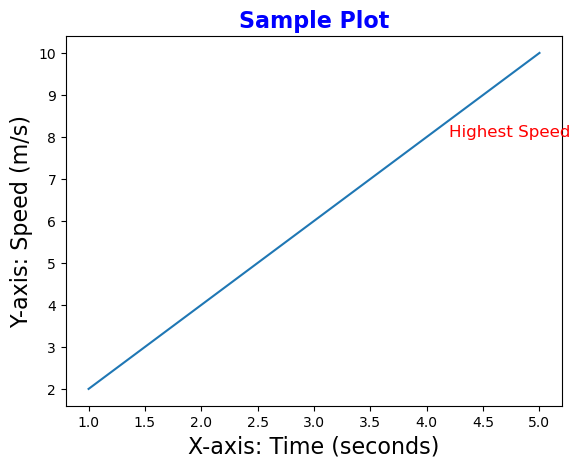

In [927]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Plotting the data
plt.plot(x, y)

# Customizing the plot
plt.title("Sample Plot", fontsize=16, fontweight='bold', color='blue')
plt.xlabel("X-axis: Time (seconds)", fontsize=16, rotation=0)
plt.ylabel("Y-axis: Speed (m/s)", fontsize=16, rotation=90)

# Adding a text annotation at a specific point
plt.text(x=4.2, y=8, s="Highest Speed", fontsize=12, color='red')

# Show the plot
plt.show()